## Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

import os
import math
import sys
import random

import torch
from torch.utils import data

# import torchvision.transforms.functional as F
# from torchvision.utils import make_grid
# from torchvision.io import read_image
# from torchvision.utils import draw_bounding_boxes
# from torchvision.models.detection import fasterrcnn_resnet50_fpn, FasterRCNN_ResNet50_FPN_Weights, faster_rcnn
# from torchvision.models import ResNet50_Weights
# from torchvision.transforms.functional import convert_image_dtype
import torchvision.transforms as transforms

# plt.rcParams["savefig.bbox"] = 'tight'

In [2]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# --------SEED------------
def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
# --------SEED------------
 
seed_everything()

In [4]:
!rm -rf /content/sample_data
!cp /content/drive/MyDrive/data.zip /content/data.zip
!unzip -qq /content/data.zip -d /content/data/
!rm /content/data.zip

In [5]:
data_path = '/content/data/'

# load data

In [66]:
labels = pd.read_excel(data_path+'label.xlsx')

In [67]:
labels.head()

image_name label_name  xmin  ymin  width  height  image_width  \
0  M3-BH130-1.jpg       wood  2412  1552    152     197         4020   
1  M3-BH130-1.jpg       wood  2917  2072    140     220         4020   
2  M3-BH130-1.jpg       wood  3820  1567    167     209         4020   
3  M3-BH130-1.jpg       wood  3603  2341    201     186         4020   
4  M3-BH130-1.jpg       wood  1676  2713    159     171         4020   

   image_height  
0          2929  
1          2929  
2          2929  
3          2929  
4          2929

In [ ]:

img_path = data_path+'train/'
dir_name = sorted(os.listdir(img_path))

In [ ]:
len(dir_name)

156

In [ ]:
df2 = pd.DataFrame(data=[file_nm.split('.')[0].split('-') for file_nm in dir_name], columns=['Mine', 'Borehole', 'Box_num'])
df2['File'] = dir_name

In [ ]:
df2.head()

Mine Borehole Box_num             File
0   M3    BH130       1   M3-BH130-1.jpg
1   M3    BH130      10  M3-BH130-10.jpg
2   M3    BH130      11  M3-BH130-11.jpg
3   M3    BH130      12  M3-BH130-12.jpg
4   M3    BH130      13  M3-BH130-13.jpg

## Input Data

In [ ]:
_ = files.upload()

In [ ]:
from utils import show_bounding_boxe, img_tensor_load, boxs_labels_fun
from dataset import Dataset_from_memory, valid_train_split
from train import train_one_epoch, valid_one_epoch, EarlyStopper, training_plot

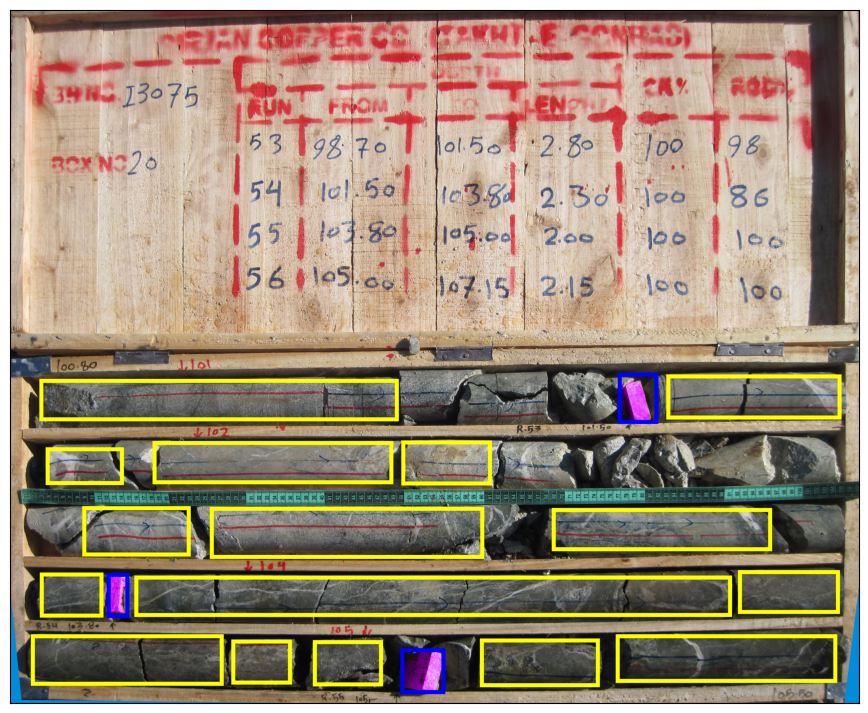

In [ ]:
show_bounding_boxe(img_path, 'M3-BH130-20.jpg', labels)

In [ ]:
all_img_tensor = img_tensor_load(img_path, df2, transform=transforms.Resize((300,400)))

  0%|          | 0/156 [00:00<?, ?it/s]

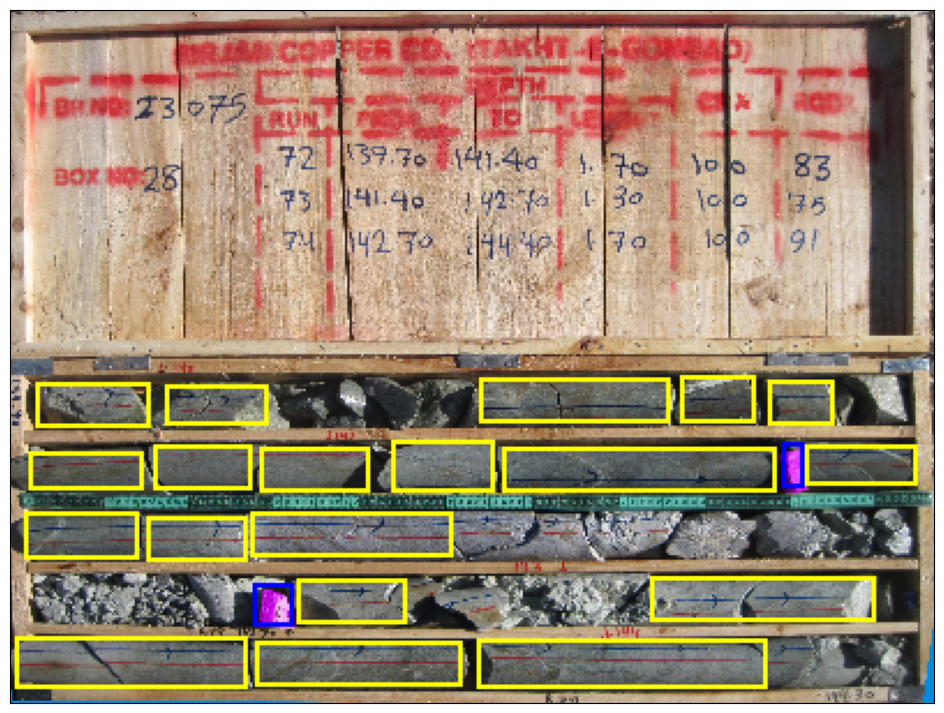

In [ ]:
show_bounding_boxe(all_img_tensor[20], df2.File[20], labels, from_ram=True)

In [ ]:
targets_dict_list = []
for i in range(len(all_img_tensor)):
    d = {}
    boxes_img, labels_img, _ , _ = boxs_labels_fun(all_img_tensor[i], df2.File[i], labels)
    d['boxes'] = boxes_img
    d['labels'] = labels_img
    targets_dict_list.append(d)

In [ ]:
train_indx, valid_indx = valid_train_split(sample_len=len(targets_dict_list), valid_percent=15)

valid size: 23, train size: 136


# Rock Model

In [ ]:
from hyperparameters import hyperopt_fmin

In [ ]:
targets_dict_list_rock = [{'boxes': t['boxes'][t['labels'] == 1], 'labels': t['labels'][t['labels'] == 1]} for t in targets_dict_list]

In [ ]:
inputData = [targets_dict_list_rock, all_img_tensor, train_indx, valid_indx]
best_hyperparams, trials = hyperopt_fmin(inputData)

{'lr': 0.0013333770781121968, 'momentum': 0.9836302020413943, 'weight_decay': 0.006664189139072378}
cuda
  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

  0%|          | 0/40 [00:00<?, ?it/s]

Train Epoch: 1 [80/136 (59%)]	 Loss: 1.425125

Train Epoch: 1 : Average loss: 1.271613
Valid Epoch: 1 : Average loss: 0.993222

Train Epoch: 2 [80/136 (59%)]	 Loss: 0.961129

Train Epoch: 2 : Average loss: 0.918999
Valid Epoch: 2 : Average loss: 1.022020

Train Epoch: 3 [80/136 (59%)]	 Loss: 0.892152

Train Epoch: 3 : Average loss: 0.898292
Valid Epoch: 3 : Average loss: 0.876535

Train Epoch: 4 [80/136 (59%)]	 Loss: 0.861240

Train Epoch: 4 : Average loss: 0.874025
Valid Epoch: 4 : Average loss: 0.897601

Train Epoch: 5 [80/136 (59%)]	 Loss: 0.801179

Train Epoch: 5 : Average loss: 0.798775
Valid Epoch: 5 : Average loss: 0.866544

Train Epoch: 6 [80/136 (59%)]	 Loss: 0.745320

Train Epoch: 6 : Average loss: 0.750756
Valid Epoch: 6 : Average loss: 0.850871

Train Epoch: 7 [80/136 (59%)]	 Loss: 0.719224

Train Epoch: 7 : Average loss: 0.747183
Valid Epoch: 7 : Average loss: 0.872498

Train Epoch: 8 [80/136 (59%)]	 Loss: 0.726054

Train Epoch: 8 : Average loss: 0.720301
Valid Epoch: 8 : 

  0%|          | 0/40 [00:00<?, ?it/s]

Train Epoch: 1 [80/136 (59%)]	 Loss: 1.366842

Train Epoch: 1 : Average loss: 1.312353
Valid Epoch: 1 : Average loss: 0.978692

Train Epoch: 2 [80/136 (59%)]	 Loss: 1.142461

Train Epoch: 2 : Average loss: 1.117727
Valid Epoch: 2 : Average loss: 1.066632

Train Epoch: 3 [80/136 (59%)]	 Loss: 1.011940

Train Epoch: 3 : Average loss: 0.960333
Valid Epoch: 3 : Average loss: 0.960264

Train Epoch: 4 [80/136 (59%)]	 Loss: 0.928470

Train Epoch: 4 : Average loss: 0.923046
Valid Epoch: 4 : Average loss: 0.889399

Train Epoch: 5 [80/136 (59%)]	 Loss: 0.863002

Train Epoch: 5 : Average loss: 0.840088
Valid Epoch: 5 : Average loss: 0.871896

Train Epoch: 6 [80/136 (59%)]	 Loss: 0.745772

Train Epoch: 6 : Average loss: 0.761438
Valid Epoch: 6 : Average loss: 0.865171

Train Epoch: 7 [80/136 (59%)]	 Loss: 0.746027

Train Epoch: 7 : Average loss: 0.755126
Valid Epoch: 7 : Average loss: 0.871908

Train Epoch: 8 [80/136 (59%)]	 Loss: 0.722936

Train Epoch: 8 : Average loss: 0.731078
Valid Epoch: 8 : 

  0%|          | 0/40 [00:00<?, ?it/s]

Train Epoch: 1 [80/136 (59%)]	 Loss: 1.401116

Train Epoch: 1 : Average loss: 1.243961
Valid Epoch: 1 : Average loss: 0.980611

Train Epoch: 2 [80/136 (59%)]	 Loss: 0.946566

Train Epoch: 2 : Average loss: 0.913091
Valid Epoch: 2 : Average loss: 0.990298

Train Epoch: 3 [80/136 (59%)]	 Loss: 0.818217

Train Epoch: 3 : Average loss: 0.823356
Valid Epoch: 3 : Average loss: 0.781287

Train Epoch: 4 [80/136 (59%)]	 Loss: 0.738125

Train Epoch: 4 : Average loss: 0.751983
Valid Epoch: 4 : Average loss: 0.833900

Train Epoch: 5 [80/136 (59%)]	 Loss: 0.705374

Train Epoch: 5 : Average loss: 0.692634
Valid Epoch: 5 : Average loss: 0.795519

Train Epoch: 6 [80/136 (59%)]	 Loss: 0.637633

Train Epoch: 6 : Average loss: 0.646503
Valid Epoch: 6 : Average loss: 0.852480

early stopper is activated after 3 steps without improvment
SCORE:
0.7812869548797607
{'lr': 0.000974858157366857, 'momentum': 0.9210683461649237, 'weight_decay': 0.00656756875609601}
cuda
  6%|▌         | 3/50 [30:23<7:05:40, 543.4

  0%|          | 0/40 [00:00<?, ?it/s]

Train Epoch: 1 [80/136 (59%)]	 Loss: 1.406675

Train Epoch: 1 : Average loss: 1.269083
Valid Epoch: 1 : Average loss: 1.004579

Train Epoch: 2 [80/136 (59%)]	 Loss: 1.019945

Train Epoch: 2 : Average loss: 0.946340
Valid Epoch: 2 : Average loss: 0.936522

Train Epoch: 3 [80/136 (59%)]	 Loss: 0.815894

Train Epoch: 3 : Average loss: 0.829003
Valid Epoch: 3 : Average loss: 0.851510

Train Epoch: 4 [80/136 (59%)]	 Loss: 0.755744

Train Epoch: 4 : Average loss: 0.760936
Valid Epoch: 4 : Average loss: 0.823347

Train Epoch: 5 [80/136 (59%)]	 Loss: 0.722097

Train Epoch: 5 : Average loss: 0.715861
Valid Epoch: 5 : Average loss: 0.797012

Train Epoch: 6 [80/136 (59%)]	 Loss: 0.679891

Train Epoch: 6 : Average loss: 0.695080
Valid Epoch: 6 : Average loss: 0.812472

Train Epoch: 7 [80/136 (59%)]	 Loss: 0.654767

Train Epoch: 7 : Average loss: 0.673427
Valid Epoch: 7 : Average loss: 0.783997

Train Epoch: 8 [80/136 (59%)]	 Loss: 0.666109

Train Epoch: 8 : Average loss: 0.657525
Valid Epoch: 8 : 

  0%|          | 0/40 [00:00<?, ?it/s]

Train Epoch: 1 [80/136 (59%)]	 Loss: 1.425051

Train Epoch: 1 : Average loss: 1.250588
Valid Epoch: 1 : Average loss: 1.014409

Train Epoch: 2 [80/136 (59%)]	 Loss: 0.937024

Train Epoch: 2 : Average loss: 0.881878
Valid Epoch: 2 : Average loss: 0.954135

Train Epoch: 3 [80/136 (59%)]	 Loss: 0.809176

Train Epoch: 3 : Average loss: 0.818971
Valid Epoch: 3 : Average loss: 0.824947

Train Epoch: 4 [80/136 (59%)]	 Loss: 0.744828

Train Epoch: 4 : Average loss: 0.762169
Valid Epoch: 4 : Average loss: 0.839627

Train Epoch: 5 [80/136 (59%)]	 Loss: 0.735792

Train Epoch: 5 : Average loss: 0.708023
Valid Epoch: 5 : Average loss: 0.751317

Train Epoch: 6 [80/136 (59%)]	 Loss: 0.632855

Train Epoch: 6 : Average loss: 0.640934
Valid Epoch: 6 : Average loss: 0.817831

Train Epoch: 7 [80/136 (59%)]	 Loss: 0.606376

Train Epoch: 7 : Average loss: 0.626066
Valid Epoch: 7 : Average loss: 0.808646

Train Epoch: 8 [80/136 (59%)]	 Loss: 0.605776

Train Epoch: 8 : Average loss: 0.601607
Valid Epoch: 8 : 

  0%|          | 0/40 [00:00<?, ?it/s]

Train Epoch: 1 [80/136 (59%)]	 Loss: 1.426749

Train Epoch: 1 : Average loss: 1.248170
Valid Epoch: 1 : Average loss: 1.024172

Train Epoch: 2 [80/136 (59%)]	 Loss: 0.961819

Train Epoch: 2 : Average loss: 0.910385
Valid Epoch: 2 : Average loss: 0.901469

Train Epoch: 3 [80/136 (59%)]	 Loss: 0.783362

Train Epoch: 3 : Average loss: 0.794788
Valid Epoch: 3 : Average loss: 0.808813

Train Epoch: 4 [80/136 (59%)]	 Loss: 0.734608

Train Epoch: 4 : Average loss: 0.739602
Valid Epoch: 4 : Average loss: 0.827854

Train Epoch: 5 [80/136 (59%)]	 Loss: 0.690507

Train Epoch: 5 : Average loss: 0.685496
Valid Epoch: 5 : Average loss: 0.769667

Train Epoch: 6 [80/136 (59%)]	 Loss: 0.640303

Train Epoch: 6 : Average loss: 0.648765
Valid Epoch: 6 : Average loss: 0.807213

Train Epoch: 7 [80/136 (59%)]	 Loss: 0.609793

Train Epoch: 7 : Average loss: 0.625335
Valid Epoch: 7 : Average loss: 0.759091

Train Epoch: 8 [80/136 (59%)]	 Loss: 0.606230

Train Epoch: 8 : Average loss: 0.596273
Valid Epoch: 8 : 

  0%|          | 0/40 [00:00<?, ?it/s]

Train Epoch: 1 [80/136 (59%)]	 Loss: 1.384117

Train Epoch: 1 : Average loss: 1.304199
Valid Epoch: 1 : Average loss: 1.308965

Train Epoch: 2 [80/136 (59%)]	 Loss: 1.116102

Train Epoch: 2 : Average loss: 1.097549
Valid Epoch: 2 : Average loss: 1.041624

Train Epoch: 3 [80/136 (59%)]	 Loss: 0.950599

Train Epoch: 3 : Average loss: 0.957922
Valid Epoch: 3 : Average loss: 0.938081

Train Epoch: 4 [80/136 (59%)]	 Loss: 0.802975

Train Epoch: 4 : Average loss: 0.810258
Valid Epoch: 4 : Average loss: 0.874460

Train Epoch: 5 [80/136 (59%)]	 Loss: 0.794496

Train Epoch: 5 : Average loss: 0.781301
Valid Epoch: 5 : Average loss: 0.880973

Train Epoch: 6 [80/136 (59%)]	 Loss: 0.729435

Train Epoch: 6 : Average loss: 0.725851
Valid Epoch: 6 : Average loss: 0.836310

Train Epoch: 7 [80/136 (59%)]	 Loss: 0.643176

Train Epoch: 7 : Average loss: 0.675324
Valid Epoch: 7 : Average loss: 0.819127

Train Epoch: 8 [80/136 (59%)]	 Loss: 0.671502

Train Epoch: 8 : Average loss: 0.659100
Valid Epoch: 8 : 

  0%|          | 0/40 [00:00<?, ?it/s]

Train Epoch: 1 [80/136 (59%)]	 Loss: 1.427332

Train Epoch: 1 : Average loss: 1.252742
Valid Epoch: 1 : Average loss: 1.058320

Train Epoch: 2 [80/136 (59%)]	 Loss: 0.994735

Train Epoch: 2 : Average loss: 0.937687
Valid Epoch: 2 : Average loss: 0.900656

Train Epoch: 3 [80/136 (59%)]	 Loss: 0.793613

Train Epoch: 3 : Average loss: 0.794869
Valid Epoch: 3 : Average loss: 0.811397

Train Epoch: 4 [80/136 (59%)]	 Loss: 0.740517

Train Epoch: 4 : Average loss: 0.744108
Valid Epoch: 4 : Average loss: 0.814729

Train Epoch: 5 [80/136 (59%)]	 Loss: 0.704693

Train Epoch: 5 : Average loss: 0.693921
Valid Epoch: 5 : Average loss: 0.763191

Train Epoch: 6 [80/136 (59%)]	 Loss: 0.637334

Train Epoch: 6 : Average loss: 0.646586
Valid Epoch: 6 : Average loss: 0.802123

Train Epoch: 7 [80/136 (59%)]	 Loss: 0.613749

Train Epoch: 7 : Average loss: 0.628305
Valid Epoch: 7 : Average loss: 0.769516

Train Epoch: 8 [80/136 (59%)]	 Loss: 0.606483

Train Epoch: 8 : Average loss: 0.602907
Valid Epoch: 8 : 

  0%|          | 0/40 [00:00<?, ?it/s]

Train Epoch: 1 [80/136 (59%)]	 Loss: 1.780876

Train Epoch: 1 : Average loss: 1.538836
Valid Epoch: 1 : Average loss: 1.182811

Train Epoch: 2 [80/136 (59%)]	 Loss: 1.168845

Train Epoch: 2 : Average loss: 1.143448
Valid Epoch: 2 : Average loss: 1.249686

Train Epoch: 3 [80/136 (59%)]	 Loss: 1.153653

Train Epoch: 3 : Average loss: 1.153764
Valid Epoch: 3 : Average loss: 1.127462

Train Epoch: 4 [80/136 (59%)]	 Loss: 1.080947

Train Epoch: 4 : Average loss: 1.066719
Valid Epoch: 4 : Average loss: 1.106067

Train Epoch: 5 [80/136 (59%)]	 Loss: 0.999602

Train Epoch: 5 : Average loss: 0.992023
Valid Epoch: 5 : Average loss: 1.075475

Train Epoch: 6 [80/136 (59%)]	 Loss: 0.962729

Train Epoch: 6 : Average loss: 0.974561
Valid Epoch: 6 : Average loss: 1.090053

Train Epoch: 7 [80/136 (59%)]	 Loss: 0.936855

Train Epoch: 7 : Average loss: 0.950142
Valid Epoch: 7 : Average loss: 1.034013

Train Epoch: 8 [80/136 (59%)]	 Loss: 0.892976

Train Epoch: 8 : Average loss: 0.888428
Valid Epoch: 8 : 

  0%|          | 0/40 [00:00<?, ?it/s]

Train Epoch: 1 [80/136 (59%)]	 Loss: 1.458547

Train Epoch: 1 : Average loss: 1.279741
Valid Epoch: 1 : Average loss: 1.112624

Train Epoch: 2 [80/136 (59%)]	 Loss: 1.036232

Train Epoch: 2 : Average loss: 0.976308
Valid Epoch: 2 : Average loss: 0.907012

Train Epoch: 3 [80/136 (59%)]	 Loss: 0.800926

Train Epoch: 3 : Average loss: 0.812201
Valid Epoch: 3 : Average loss: 0.816620

Train Epoch: 4 [80/136 (59%)]	 Loss: 0.745006

Train Epoch: 4 : Average loss: 0.754966
Valid Epoch: 4 : Average loss: 0.827901

Train Epoch: 5 [80/136 (59%)]	 Loss: 0.718400

Train Epoch: 5 : Average loss: 0.705376
Valid Epoch: 5 : Average loss: 0.788606

Train Epoch: 6 [80/136 (59%)]	 Loss: 0.644433

Train Epoch: 6 : Average loss: 0.657306
Valid Epoch: 6 : Average loss: 0.831435

Train Epoch: 7 [80/136 (59%)]	 Loss: 0.609517

Train Epoch: 7 : Average loss: 0.628419
Valid Epoch: 7 : Average loss: 0.800035

Train Epoch: 8 [80/136 (59%)]	 Loss: 0.602526

Train Epoch: 8 : Average loss: 0.593615
Valid Epoch: 8 : 

  0%|          | 0/40 [00:00<?, ?it/s]

Train Epoch: 1 [80/136 (59%)]	 Loss: 1.472670

Train Epoch: 1 : Average loss: 1.268998
Valid Epoch: 1 : Average loss: 1.632229

Train Epoch: 2 [80/136 (59%)]	 Loss: 1.543184
Loss is nan, stopping training
{'loss_classifier': tensor(nan, device='cuda:0', grad_fn=<NllLossBackward0>), 'loss_box_reg': tensor(nan, device='cuda:0', grad_fn=<DivBackward0>), 'loss_objectness': tensor(nan, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward0>), 'loss_rpn_box_reg': tensor(nan, device='cuda:0', grad_fn=<DivBackward0>)}
error
SCORE:
1
{'lr': 0.006694502160930447, 'momentum': 0.9620846469389119, 'weight_decay': 5.173421051249294e-05}
cuda
 22%|██▏       | 11/50 [1:42:47<5:03:31, 466.97s/trial, best loss: 0.6644079983234406]

  0%|          | 0/40 [00:00<?, ?it/s]

Train Epoch: 1 [80/136 (59%)]	 Loss: 1.347730

Train Epoch: 1 : Average loss: 1.271463
Valid Epoch: 1 : Average loss: 1.215976

Train Epoch: 2 [80/136 (59%)]	 Loss: 1.098829

Train Epoch: 2 : Average loss: 1.046985
Valid Epoch: 2 : Average loss: 1.038408

Train Epoch: 3 [80/136 (59%)]	 Loss: 0.946528

Train Epoch: 3 : Average loss: 0.930343
Valid Epoch: 3 : Average loss: 0.941979

Train Epoch: 4 [80/136 (59%)]	 Loss: 0.889140

Train Epoch: 4 : Average loss: 0.900434
Valid Epoch: 4 : Average loss: 0.995608

Train Epoch: 5 [80/136 (59%)]	 Loss: 0.865498
error
SCORE:
1
{'lr': 0.003181190684260746, 'momentum': 0.9120605275423346, 'weight_decay': 0.0005700949641364717}
cuda
 24%|██▍       | 12/50 [1:46:17<4:06:16, 388.86s/trial, best loss: 0.6644079983234406]

  0%|          | 0/40 [00:00<?, ?it/s]

error
SCORE:
1
{'lr': 0.005210165666910756, 'momentum': 0.9725723039646563, 'weight_decay': 0.0025286952513437935}
cuda
 26%|██▌       | 13/50 [1:46:23<2:48:17, 272.91s/trial, best loss: 0.6644079983234406]

  0%|          | 0/40 [00:00<?, ?it/s]

error
SCORE:
1
{'lr': 0.002812491687933432, 'momentum': 0.950385182859258, 'weight_decay': 0.005451758869994807}
cuda
 28%|██▊       | 14/50 [1:46:26<4:33:42, 456.17s/trial, best loss: 0.6644079983234406]


KeyboardInterrupt: ignored

In [ ]:
from train import train_valid_setup

In [ ]:
# {'lr': 0.008388406010734754, 'momentum': 0.9444939643124248, 'weight_decay': 0.007445852010334835}
train_loss, valid_loss = train_valid_setup(lr=0.008388406010734754, 
                                          momentum=0.9444939643124248, 
                                          weight_decay=0.007445852010334835, 
                                          batch_size=8, 
                                          num_epochs=40,
                                          train_indx=train_indx, 
                                          valid_indx=valid_indx, 
                                          all_img_tensor=all_img_tensor, 
                                          targets_dict_list=targets_dict_list_rock,
                                          num_classes=2,
                                          modelType={'name':'rock','max':0.75,'patience':4, 'imgT':True})

cuda


  0%|          | 0/40 [00:00<?, ?it/s]

Train Epoch: 1 [80/136 (59%)]	 Loss: 1.387240

Train Epoch: 1 : Average loss: 1.318509
Valid Epoch: 1 : Average loss: 1.252232

Train Epoch: 2 [80/136 (59%)]	 Loss: 1.004344

Train Epoch: 2 : Average loss: 1.049903
Valid Epoch: 2 : Average loss: 1.124514

Train Epoch: 3 [80/136 (59%)]	 Loss: 0.986838

Train Epoch: 3 : Average loss: 1.005960
Valid Epoch: 3 : Average loss: 0.912621

Train Epoch: 4 [80/136 (59%)]	 Loss: 0.849079

Train Epoch: 4 : Average loss: 0.853634
Valid Epoch: 4 : Average loss: 0.931757

Train Epoch: 5 [80/136 (59%)]	 Loss: 0.816266

Train Epoch: 5 : Average loss: 0.791667
Valid Epoch: 5 : Average loss: 0.805373

Train Epoch: 6 [80/136 (59%)]	 Loss: 0.691931

Train Epoch: 6 : Average loss: 0.705599
Valid Epoch: 6 : Average loss: 0.870576

Train Epoch: 7 [80/136 (59%)]	 Loss: 0.669841

Train Epoch: 7 : Average loss: 0.693340
Valid Epoch: 7 : Average loss: 0.835091

Train Epoch: 8 [80/136 (59%)]	 Loss: 0.673129

Train Epoch: 8 : Average loss: 0.665067
Valid Epoch: 8 : 

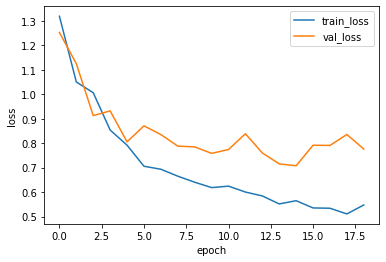

In [ ]:
training_plot(train_loss, valid_loss)

In [ ]:
!cp /content/checkPoint_rock_model.pth /content/drive/MyDrive

# inference rock model

In [ ]:
from utils import load_weights_fun, collate_fn, imgs_with_boxes, show
from model import model_select
from train import img_transform
from torchvision.transforms.functional import convert_image_dtype

In [ ]:
model, optimizer, device = model_select(lr=0.008388406010734754, 
                                          momentum=0.9444939643124248, 
                                          weight_decay=0.007445852010334835, 
                                        num_classes=2)
load_weights_fun('/content/drive/MyDrive/checkPoint_rock_model.pth', model, optimizer)

img_temp = img_transform()(convert_image_dtype(all_img_tensor[train_indx[0:3]], dtype=torch.float32))

model = model.eval()
outputs = model(img_temp.to(device))

cuda
epoch: 15 valid_loss: 0.7075221538543701 train_loss: 0.5647713717292336
CRNN model reloaded!


In [ ]:
imgs_with_boxes_pred = imgs_with_boxes(all_img_tensor[train_indx[0:3]], 
                                       outputs, 
                                       score_threshold=0.8, 
                                       pred=True)
imgs_with_boxes_true = imgs_with_boxes(all_img_tensor[train_indx[0:3]],
                                       [targets_dict_list_rock[i] for i in train_indx[0:3]], 
                                       score_threshold=0.8, 
                                       pred=False)

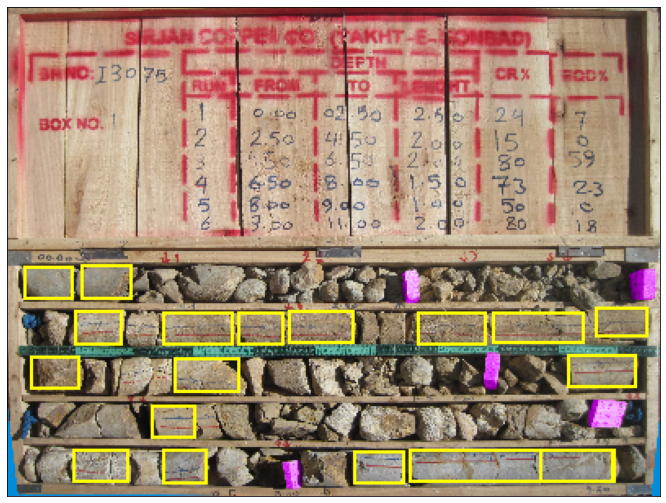

In [ ]:
show(imgs_with_boxes_pred[0])

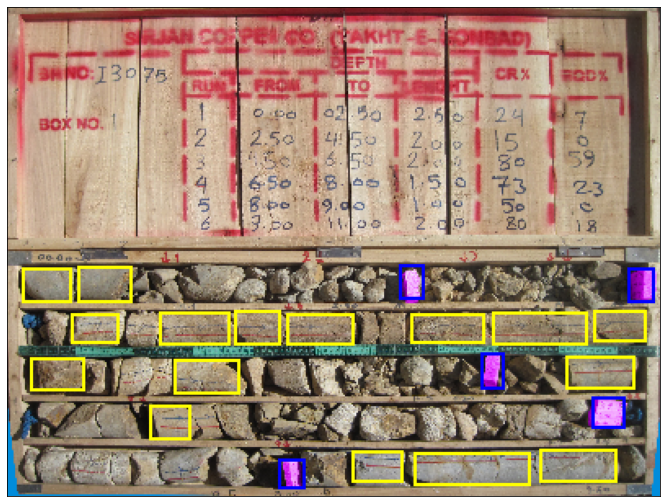

In [ ]:
show(imgs_with_boxes_true[0])

# Wood model

In [ ]:
from hyperparameters import hyperopt_fmin

In [ ]:
targets_dict_list_wood = [{'boxes': t['boxes'][t['labels'] == 0], 'labels': t['labels'][t['labels'] == 0]+1} for t in targets_dict_list]

In [ ]:
inputData = [targets_dict_list_wood, all_img_tensor, train_indx, valid_indx]
best_hyperparams, trials = hyperopt_fmin(inputData)

In [ ]:
# from train import train_valid_setup

In [ ]:
train_loss, valid_loss = train_valid_setup(lr=0.006039497039954175, 
                                          momentum=0.9708223564790668, 
                                          weight_decay=0.0014905031197396778, 
                                          batch_size=8, 
                                          num_epochs=40,
                                          train_indx=train_indx, 
                                          valid_indx=valid_indx, 
                                          all_img_tensor=all_img_tensor, 
                                          targets_dict_list=targets_dict_list_wood,
                                          num_classes=2,
                                          modelType={'name':'wood','max':0.30,'patience':4, 'imgT':False})

cuda


  0%|          | 0/40 [00:00<?, ?it/s]

Train Epoch: 1 [80/136 (59%)]	 Loss: 0.624369

Train Epoch: 1 : Average loss: 0.554977
Valid Epoch: 1 : Average loss: 0.455543

Train Epoch: 2 [80/136 (59%)]	 Loss: 0.360952

Train Epoch: 2 : Average loss: 0.367274
Valid Epoch: 2 : Average loss: 0.390647

Train Epoch: 3 [80/136 (59%)]	 Loss: 0.354061

Train Epoch: 3 : Average loss: 0.340202
Valid Epoch: 3 : Average loss: 0.363685

Train Epoch: 4 [80/136 (59%)]	 Loss: 0.328678

Train Epoch: 4 : Average loss: 0.311329
Valid Epoch: 4 : Average loss: 0.325852

Train Epoch: 5 [80/136 (59%)]	 Loss: 0.274471

Train Epoch: 5 : Average loss: 0.275867
Valid Epoch: 5 : Average loss: 0.359804

Train Epoch: 6 [80/136 (59%)]	 Loss: 0.282035

Train Epoch: 6 : Average loss: 0.271541
Valid Epoch: 6 : Average loss: 0.293268

model of epoch 6 saved
Train Epoch: 7 [80/136 (59%)]	 Loss: 0.260911

Train Epoch: 7 : Average loss: 0.255623
Valid Epoch: 7 : Average loss: 0.312623

Train Epoch: 8 [80/136 (59%)]	 Loss: 0.250650

Train Epoch: 8 : Average loss: 0.2

In [ ]:
!cp /content/checkPoint_wood_model.pth /content/drive/MyDrive

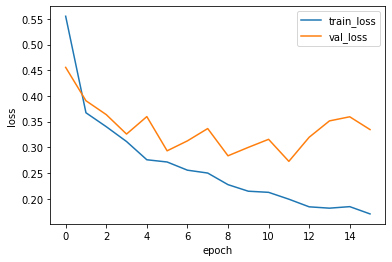

In [ ]:
training_plot(train_loss, valid_loss)

# inference wood model

In [ ]:
from utils import load_weights_fun, collate_fn, show, imgs_with_boxes
from model import model_select
from dataset import img_transform

In [ ]:
model, optimizer, device = model_select(lr=0.006039497039954175, 
                                        momentum=0.9708223564790668, 
                                        weight_decay=0.0014905031197396778, 
                                        num_classes=2)
load_weights_fun('/content/drive/MyDrive/checkPoint_wood_model.pth', model, optimizer)

img_temp = convert_image_dtype(all_img_tensor[train_indx[0:3]], dtype=torch.float32)

model = model.eval()
outputs = model(img_temp.to(device))

cuda
epoch: 12 valid_loss: 0.2727706730365753 train_loss: 0.1991928482756895
CRNN model reloaded!


In [ ]:
imgs_with_boxes_pred = imgs_with_boxes(all_img_tensor[train_indx[0:3]], 
                                       outputs, 
                                       score_threshold=0.8, 
                                       pred=True)
imgs_with_boxes_true = imgs_with_boxes(all_img_tensor[train_indx[0:3]],
                                       [targets_dict_list_wood[i] for i in train_indx[0:3]], 
                                       score_threshold=0.8, 
                                       pred=False)

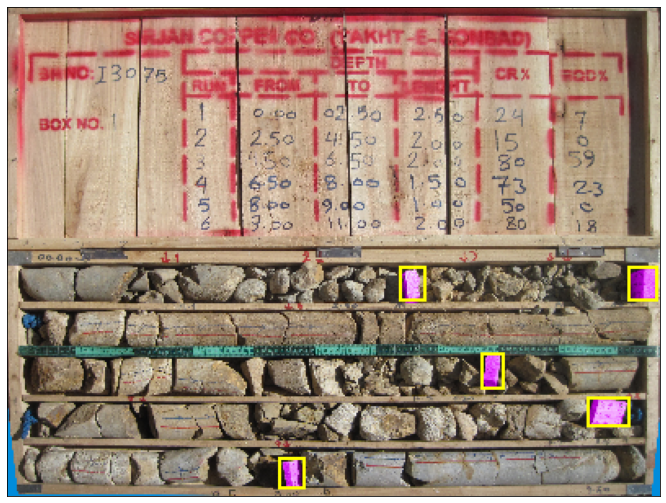

In [ ]:
show(imgs_with_boxes_pred[0])

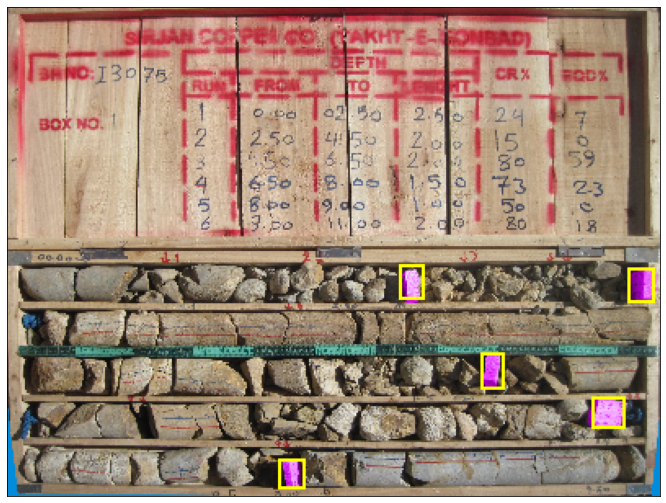

In [ ]:
show(imgs_with_boxes_true[0])

## Inference Test dataset

## load data

In [ ]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

_ = files.upload()

In [2]:
!rm -rf /content/sample_data
!cp /content/drive/MyDrive/data.zip /content/data.zip
!unzip -qq /content/data.zip -d /content/data/
!rm /content/data.zip

In [3]:
import os
import pandas as pd
import torchvision.transforms as transforms

from torchvision.utils import draw_bounding_boxes
from utils import imgs_with_boxes, img_tensor_load, show

import torch
from torch.utils import data

In [4]:
data_path = '/content/data/'

In [5]:
# Detect devices
use_cuda = torch.cuda.is_available()                   # check if GPU exists
device = torch.device("cuda" if use_cuda else "cpu")   # use CPU or GPU
print(device)


data_path_test = '/content/data/test-rqd/'
dir_name_test = sorted(os.listdir(data_path_test))

df2_test = pd.DataFrame(data=[file_nm.split('.')[0].split('-') for file_nm in dir_name_test], columns=['Mine', 'Borehole', 'Box_num'])
df2_test['File'] = dir_name_test

all_img_tensor_test = img_tensor_load(data_path_test, df2_test, transform=transforms.Resize((300,400)))

df = pd.read_excel(data_path+'from-to-rqd.xlsx')

cuda


  0%|          | 0/48 [00:00<?, ?it/s]

## load model

In [7]:
from postprocessing import calc_runs_length_all_boxes, calc_rq, type_selection

In [8]:
from postprocessing import inference_test_data

In [9]:
output_rock_list, output_wood_list = inference_test_data(all_img_tensor_test, 
                                                        device,
                                                        rock_model_path='/content/drive/MyDrive/checkPoint_rock_model.pth', 
                                                        wood_model_path='/content/drive/MyDrive/checkPoint_wood_model.pth', 
                                                        score_threshold=0.8, 
                                                        box_iou_threshold=0.1)

cuda


Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


epoch: 12 valid_loss: 0.2727706730365753 train_loss: 0.1991928482756895
CRNN model reloaded!
cuda
epoch: 15 valid_loss: 0.7075221538543701 train_loss: 0.5647713717292336
CRNN model reloaded!
start predicting boxes!


  0%|          | 0/6 [00:00<?, ?it/s]

combine predicted boxes!


  0%|          | 0/48 [00:00<?, ?it/s]

In [11]:
outputs = []
for i, j in zip(output_wood_list, output_rock_list):
  outputs.append( {'boxes':torch.cat([i,j]), 'labels':[0 for jj in range(len(i))] + [1 for jj in range(len(j))]} )

img_with_boxes_pred = imgs_with_boxes(all_img_tensor_test, 
                                       outputs, 
                                       score_threshold=0.8, 
                                       pred=False)

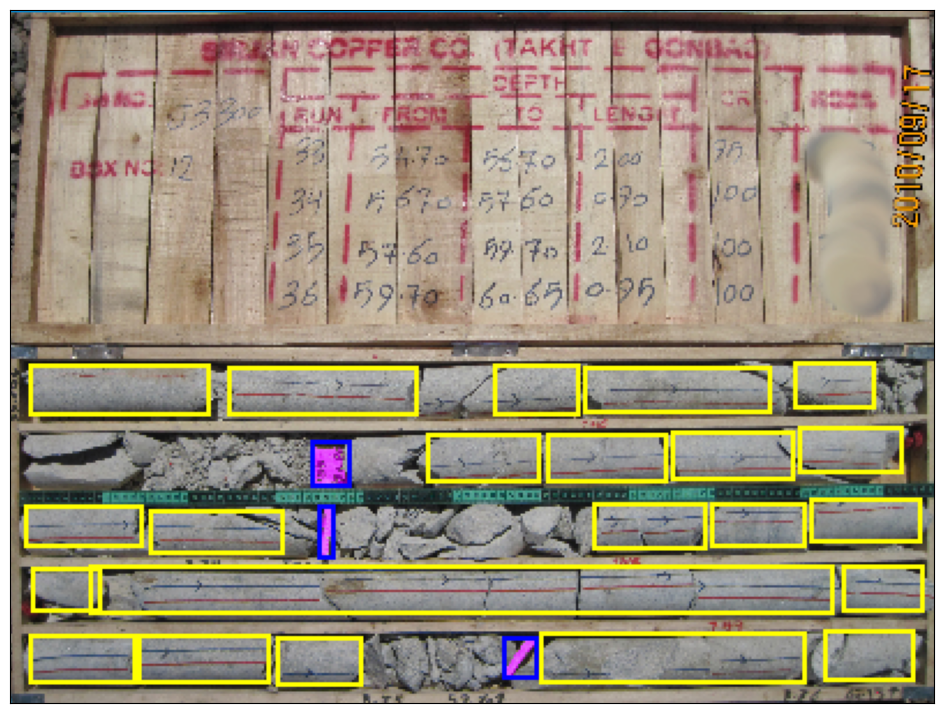

In [12]:
show(img_with_boxes_pred[12])

In [13]:
df['File'] = ['-'.join(i.split('-')[:-1])+'.jpg' for i in df.RunId]

runs_dep_dict = df.groupby('File').apply(lambda g: list(100*(g['to'] - g['from']).values) ).to_dict()
runs_dep_list = [runs_dep_dict[i] for i in df2_test.File.to_list()]

In [14]:
from postprocessing import calculate_sub

In [18]:
sub = calculate_sub(output_rock_list, output_wood_list, runs_dep_list, df2_test, device)

In [ ]:
sub